In [1]:
! pip install transformers
! pip install torch
! pip install safetensors

In [4]:
!pip install transformers torch


In [ ]:
!pip install --upgrade transformers


In [45]:
! pip install gtts

# Import necessary libraries


In [ ]:
from transformers import AutoImageProcessor, SegformerForSemanticSegmentation
import torch
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import torch.nn as nn
import numpy as np
import cv2
from gtts import gTTS
from IPython.display import Audio, display

# Clothes Segmentation

In [ ]:
# Load the processor and model
processor = AutoImageProcessor.from_pretrained("sayeed99/segformer_b3_clothes")
model = SegformerForSemanticSegmentation.from_pretrained("sayeed99/segformer_b3_clothes")


Saving img.png to img (3).png


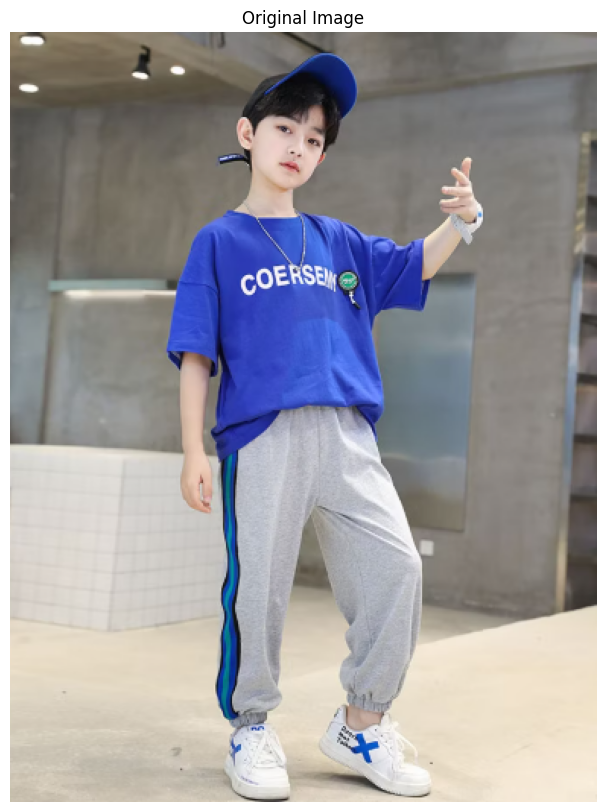

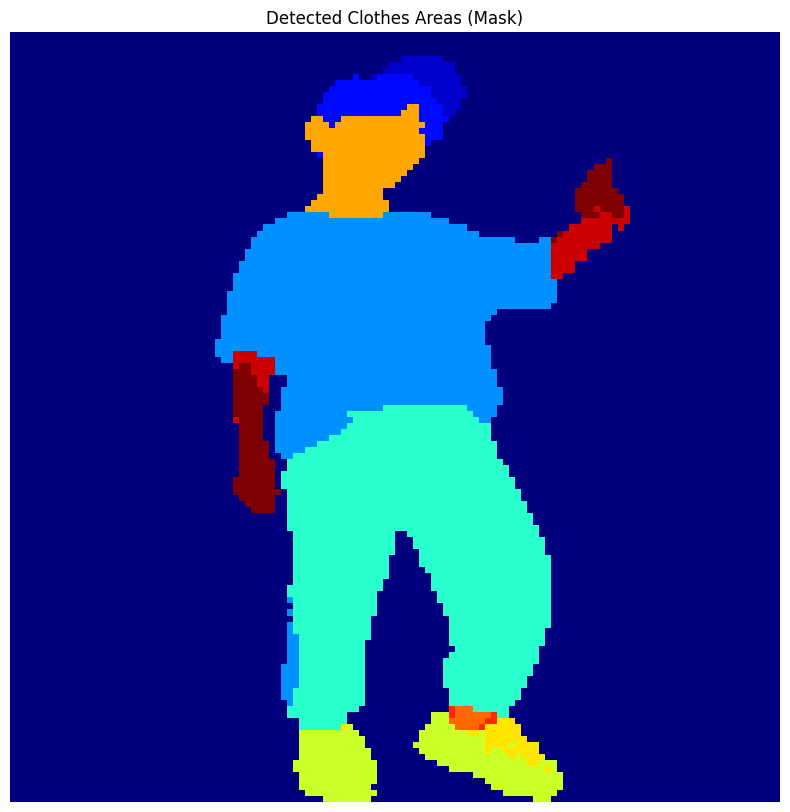

In [50]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Upload the image from the user's device
uploaded = files.upload()

# Get the file path of the uploaded image
image_path = next(iter(uploaded))  # Get the file name of the uploaded image

# Open the uploaded image using PIL
image = Image.open(image_path)

# Ensure the image is in RGB format
image = image.convert("RGB")

# Process the image using the processor (make sure the processor is defined correctly for your model)
inputs = processor(images=image, return_tensors="pt")

# Run the model to detect clothes (no need to compute gradients)
with torch.no_grad():
    outputs = model(**inputs)

# Get the output logits (raw output from the model)
logits = outputs.logits

# Apply argmax to get the final segmentation mask for each class
masks = torch.argmax(logits, dim=1)  # This will give the mask with the predicted classes

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Display the mask showing the detected areas of clothes
plt.figure(figsize=(10, 10))
plt.imshow(masks[0].cpu().numpy(), cmap='jet')  # Mask for clothes using a 'jet' color map
plt.title("Detected Clothes Areas (Mask)")
plt.axis('off')
plt.show()


# Segment the upper clothes

Saving img.png to img (5).png


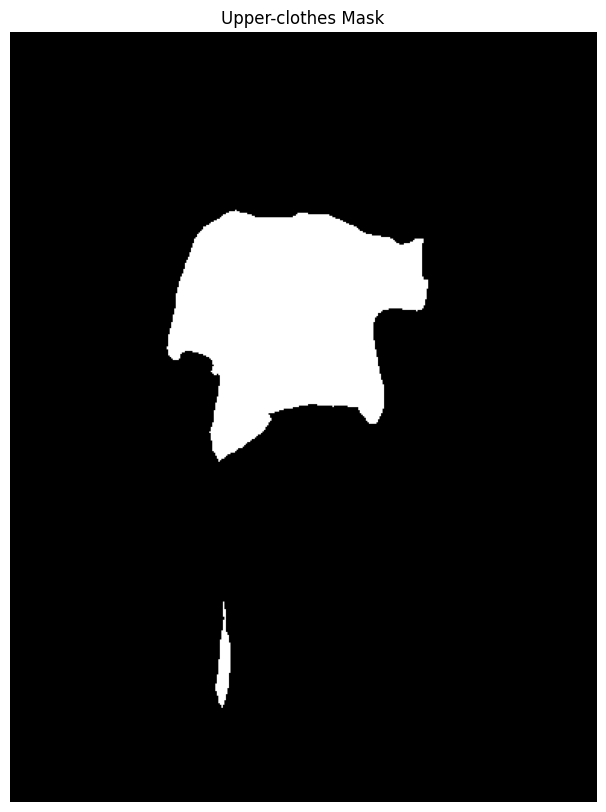

In [52]:
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Allow the user to upload an image from their device
uploaded = files.upload()

# Get the uploaded image path
image_path = next(iter(uploaded))  # Getting the filename of the uploaded image

# Read the uploaded image
image = Image.open(image_path)

# Ensure the image is in RGB format (necessary for processing)
image = image.convert("RGB")

# Process the image using the processor (make sure the processor is correctly defined for your model)
inputs = processor(images=image, return_tensors="pt")

# Apply the model to the image (without computing gradients)
with torch.no_grad():
    outputs = model(**inputs)

# Get the output logits (raw outputs from the model)
logits = outputs.logits.cpu()  # Ensure logits are on the CPU

# Upsampling the output logits to match the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # Reversing size tuple to (height, width)
    mode="bilinear",         # Using bilinear interpolation for resizing
    align_corners=False      # Avoiding corner alignment issues
)

# Getting the segmentation mask by applying argmax to the logits
pred_seg = upsampled_logits.argmax(dim=1)[0]  # Taking the first image in the batch

# Assuming class '4' corresponds to the upper-clothes, create the mask
upper_clothes_mask = pred_seg == 4

# Display the mask as a grayscale image
plt.figure(figsize=(10, 10))
plt.imshow(upper_clothes_mask, cmap='gray')
plt.title("Upper-clothes Mask")
plt.axis('off')  # Hide axis labels for cleaner visualization
plt.show()


Saving img.png to img (6).png


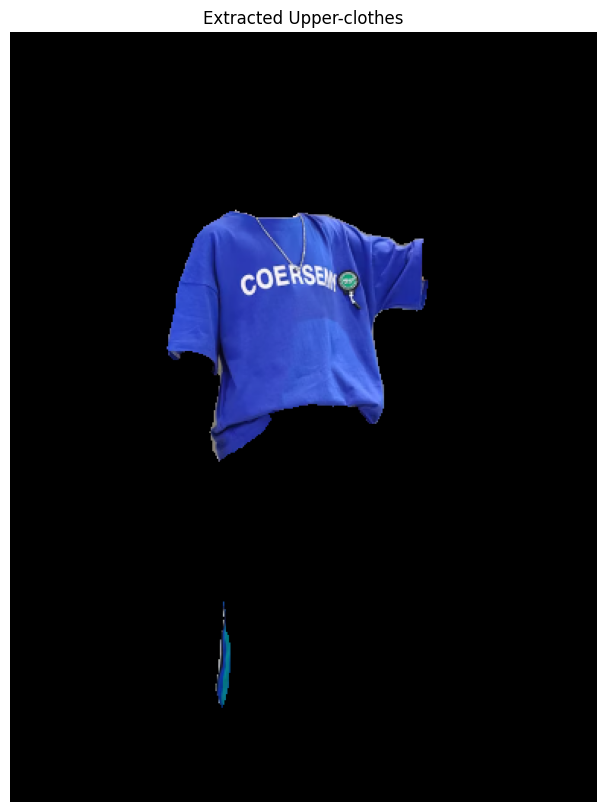

In [53]:
import numpy as np
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Allowing the user to upload an image from their device
uploaded = files.upload()

# Get the uploaded image path
image_path = next(iter(uploaded))  # Getting the filename of the uploaded image

# Open the uploaded image
image = Image.open(image_path)

# Convert the image to RGB if not already
image = image.convert("RGB")

# Process the image using the processor
inputs = processor(images=image, return_tensors="pt")

# Apply the model to the image (without computing gradients)
with torch.no_grad():
    outputs = model(**inputs)

# Get the output logits (raw outputs from the model)
logits = outputs.logits.cpu()  # Ensure logits are on the CPU

# Upsampling the output logits to match the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # Reversing size tuple to (height, width)
    mode="bilinear",         # Using bilinear interpolation for resizing
    align_corners=False      # Avoiding corner alignment issues
)

# Getting the segmentation mask by applying argmax to the logits
pred_seg = upsampled_logits.argmax(dim=1)[0]  # Taking the first image in the batch

# Assuming class '4' corresponds to the upper-clothes, create the mask
upper_clothes_mask = pred_seg == 4

# Convert the mask to a numpy array with values 0 or 1
upper_clothes_mask = upper_clothes_mask.numpy().astype(np.uint8)

# Convert the original image to a numpy array to preserve the color
image_np = np.array(image)

# Create an output image initialized to all zeros (black image)
output_image = np.zeros_like(image_np)

# Copy the "upper-clothes" region from the original image to the new output image using the mask
for c in range(3):  # Looping through the RGB channels
    output_image[..., c] = image_np[..., c] * upper_clothes_mask

# Convert the numpy array back to an image
output_image = Image.fromarray(output_image)

# Display the resulting image with the upper-clothes isolated
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title("Extracted Upper-clothes")
plt.axis('off')  # Hide axis for cleaner visualization
plt.show()


# Detect the color of the upper clothes

Saving img.png to img (11).png
Color Detected: BLUE


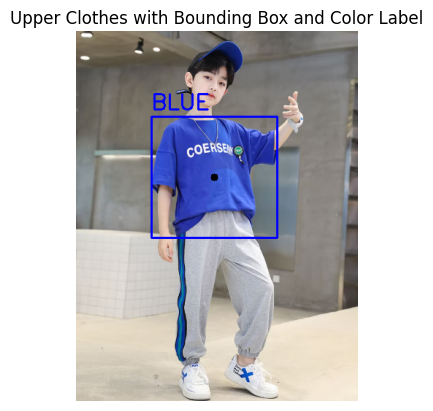

In [58]:
import numpy as np
import cv2
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import files
from transformers import AutoProcessor, AutoModelForImageSegmentation  # Importing processor and model

# Upload the image from the user's device
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the uploaded file name

# Read the image using PIL
image = Image.open(image_path)

# Convert the image to RGB (to avoid issues with RGBA or transparency channels)
image = image.convert("RGB")

# Convert the image to a tensor using the processor
inputs = processor(images=image, return_tensors="pt")  # Convert image to tensor
outputs = model(**inputs)  # Apply the model to the input
logits = outputs.logits.cpu()  # Move logits to the CPU

# Upsample the output logits to match the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # Resize to (height, width)
    mode="bilinear",        # Use bilinear interpolation
    align_corners=False,    # Do not align corners
)

# Extract the mask for the upper clothes (assuming class 4 represents upper clothes)
pred_seg = upsampled_logits.argmax(dim=1)[0]  # Get the class with the highest probability
upper_clothes_mask = pred_seg == 4  # Create a mask where the class equals 4

# Convert the mask to a NumPy array
upper_clothes_mask = upper_clothes_mask.numpy().astype(np.uint8)
image_np = np.array(image)  # Convert the original image to a NumPy array

# Extract the contours of the upper clothes mask
contours, _ = cv2.findContours(upper_clothes_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # Find the largest contour and get its bounding rectangle
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cx, cy = x + w // 2, y + h // 2  # Calculate the center of the bounding box

    # Extract the color of the central point in HSV format
    hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)
    pixel_center = hsv_image[cy, cx]  # Get the HSV value of the center pixel
    hue_value = pixel_center[0]  # Extract the hue value

    # Determine the color based on the hue value
    color = "Undefined"
    if hue_value < 5:
        color = "RED"
        box_color = (255, 0, 0)
    elif hue_value < 22:
        color = "ORANGE"
        box_color = (255, 165, 0)
    elif hue_value < 33:
        color = "YELLOW"
        box_color = (255, 255, 0)
    elif hue_value < 78:
        color = "GREEN"
        box_color = (0, 255, 0)
    elif hue_value < 131:
        color = "BLUE"
        box_color = (0, 0, 255)
    elif hue_value < 170:
        color = "VIOLET"
        box_color = (238, 130, 238)
    else:
        color = "RED"
        box_color = (255, 0, 0)

    # Print the detected color in the terminal
    print(f"Color Detected: {color}")

    # Draw a rectangle around the upper clothes and mark the center point
    output_image = image_np.copy()
    cv2.rectangle(output_image, (x, y), (x + w, y + h), box_color, 2)  # Draw the bounding box
    cv2.putText(output_image, color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, box_color, 2)  # Display the color label
    cv2.circle(output_image, (cx, cy), 5, (0, 0, 0), -1)  # Draw the center point

    # Display the final image with the original colors
    plt.imshow(output_image)
    plt.title("Upper Clothes with Bounding Box and Color Label")
    plt.axis('off')  # Hide axis labels
    plt.show()
else:
    print("Upper clothes not found.")  # Message if no upper clothes are detected


# audio output

Saving img.png to img (13).png
Color Detected: BLUE


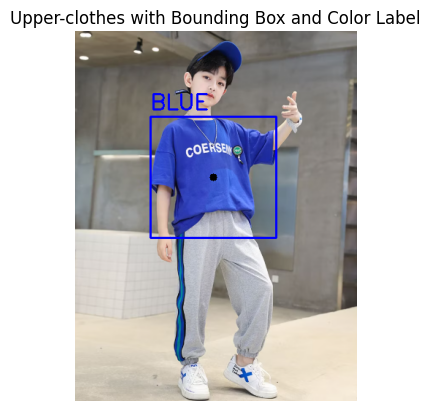

In [60]:
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get the uploaded file's name

# Read the image using PIL
image = Image.open(image_path)

# Convert the image to RGB (to ensure it's in the right format for processing)
image = image.convert("RGB")

# Convert the image to a tensor using the processor
inputs = processor(images=image, return_tensors="pt")  # Convert image to tensor
outputs = model(**inputs)  # Apply the model to the image
logits = outputs.logits.cpu()  # Move logits to the CPU

# Upsample the output logits to match the original image size
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # Resize to (height, width)
    mode="bilinear",        # Use bilinear interpolation
    align_corners=False,    # Disable corner alignment
)

# Extract the mask for upper clothes
pred_seg = upsampled_logits.argmax(dim=1)[0]  # Get the class with the highest probability
upper_clothes_mask = pred_seg == 4  # Assume class 4 represents upper clothes

# Convert the mask to a NumPy array
upper_clothes_mask = upper_clothes_mask.numpy().astype(np.uint8)
image_np = np.array(image)  # Convert the original image to a NumPy array

# Extract the contours of the upper clothes mask
contours, _ = cv2.findContours(upper_clothes_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # Find the largest contour and get its bounding rectangle
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cx, cy = x + w // 2, y + h // 2  # Calculate the center of the rectangle

    # Extract the color of the central point in HSV
    hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)
    pixel_center = hsv_image[cy, cx]
    hue_value = pixel_center[0]  # Get the hue value

    # Determine the color based on the hue value
    color = "Undefined"
    if hue_value < 5:
        color = "RED"
        box_color = (255, 0, 0)
    elif hue_value < 22:
        color = "ORANGE"
        box_color = (255, 165, 0)
    elif hue_value < 33:
        color = "YELLOW"
        box_color = (255, 255, 0)
    elif hue_value < 78:
        color = "GREEN"
        box_color = (0, 255, 0)
    elif hue_value < 131:
        color = "BLUE"
        box_color = (0, 0, 255)
    elif hue_value < 170:
        color = "VIOLET"
        box_color = (238, 130, 238)
    else:
        color = "RED"
        box_color = (255, 0, 0)

    # Print the detected color in the terminal
    print(f"Color Detected: {color}")

    # Generate speech output for the detected color
    speech_text = f"The upper clothes color is {color}."
    tts = gTTS(speech_text)  # Convert text to speech
    tts.save("upper_clothes_color.mp3")  # Save the audio file
    display(Audio("upper_clothes_color.mp3", autoplay=True))  # Play the audio file

    # Draw the bounding box and center point, and display the color name
    output_image = image_np.copy()
    cv2.rectangle(output_image, (x, y), (x + w, y + h), box_color, 2)  # Draw the bounding box
    cv2.putText(output_image, color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, box_color, 2)  # Display color label
    cv2.circle(output_image, (cx, cy), 5, (0, 0, 0), -1)  # Mark the center point

    # Display the final image with the original colors
    plt.imshow(output_image)
    plt.title("Upper-clothes with Bounding Box and Color Label")
    plt.axis('off')  # Hide axis labels
    plt.show()
else:
    print("Upper clothes not found.")
